# Separable JSA for photon triplets

# Ideal case for waveguides

## Conditions: phase-matching, group-velocity matching, $\beta_F\gg\beta_P$

### Minimal working example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from matplotlib.ticker import FormatStrFormatter

**Phase-mismatch Taylor expansion**

$$
\frac{\ell}{2} \Delta k\left(\delta\omega_1,\delta\omega_2,\delta\omega_3\right)=\tau_1 \left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)+\tau_P^2\left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)^2-\tau_F^2\left(\delta\omega_1^2+\delta\omega_2^2+\delta\omega_3^2\right),$$

where 

$$\tau_1=\frac{L}{2}\left(\frac{1}{v_{g_{P}}}-\frac{1}{v_{g_{F}}}\right),~\tau_P^2=\frac{L}{4}\beta_{2_P},~\tau_F^2=\frac{L}{4}\beta_{2_F}.$$

**Phase-mismatch expansion in scaled units**

Defining scaled frequencies $w_1,~w_2,~w_3~=~\tau_F~\delta\omega_1,~\tau_F~\delta\omega_2,~\tau_F~\delta\omega_3$, we have

$$\frac{\ell}{2} \Delta k\left(w_1,~w_2,~w_3\right)=\frac{\tau_1}{\tau_F} \left(w_1+~w_2+~w_3\right)+\frac{\tau_P^2}{\tau_F^2}\left(w_1+~w_2+~w_3\right)^2-\left(w_1^2+w_2^2+w_3^2\right),$$

**Pump envelope function in scaled units**

Defining a gaussian pump:

$$\alpha \left(\delta\omega_1,\delta\omega_2,\delta\omega_3\right)= \exp \left(-\frac{1}{2}T^2\left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)^2\right)$$

We can now write it in scaled units as

$$\alpha \left(w_1,~w_2,~w_3\right)= \exp \left(-\frac{1}{2}\frac{T^2}{\tau_F^2}\left(w_1+w_2+w_3\right)^2\right)$$

In [2]:
#Wavevector expansion: Phase mismatch calculation
def ldelk(tau1, taup,tauf,w1,w2,w3): 
    ldelk=(tau1/tauf)*(w1+w2+w3)+((taup**2)/(tauf**2))*(w1*w2+w2*w3+w1*w3)+(w1**2+w2**2+w3**2)
    return ldelk

In [3]:
#JSA-Using the Taylor expansion of the wavevector
def JSAD(tau1, taup,tauf,w1,w2,w3,T0):
    jsad=np.sinc((1/(np.pi))*(ldelk(tau1, taup,tauf,w1,w2,w3)))*np.exp(-(1/2)*(T0**2/tauf**2)*((w1+w2+w3))**2)
    return jsad

### Experiment 1: Pump bandwidth matching the phase-matching bandwidth

In [4]:
#Conditions
tau11=0  # Group-velocity matching
taup1=0  # \beta_P << \beta_F -->\beta_P negligible in comparison to \beta_F
tauf1=1  # \beta_F >> \beta_P
sigmapm=np.sqrt(np.pi)/tauf1 # Approximate HWHM of the phase-matching function, measured in terms of the sinc's main lobe width
T01=1/sigmapm # Matching the phase-matching bandwidth

In [5]:
# Spectral resolution
delw=sigmapm/60 # The spectral resolution is defined such that a minimum of 60 discrete points are sampled within each frequency vector over the bandwidth of the phase-matching function, regardless of the specific width of the evaluation function.

#Spectral window
domg=8*sigmapm # We set the half-width of the frequency window wide enough to sample correctly both the jsa and reduced density matrix
omf=np.arange(-domg,domg,delw)
print(omf.size) # Note: Always check the frequency vector size, because later we are going to build a 3D grid with it, which greatly affects  the memory usage. 

960


In [6]:
JSA_3D1=JSAD(tau11,taup1,tauf1,omf[:,None,None],omf[None,:,None],omf[None,None,:],T01) 
jsi_integral1=np.sum(np.square(np.abs(JSA_3D1)),axis=0)

In [7]:
rho_aD1=np.einsum('ijk,ljk->il',JSA_3D1,np.conj(JSA_3D1))
U1,S1,Vh1=np.linalg.svd(rho_aD1,full_matrices=True, hermitian=True)
purity1=np.sum(S1)**2/np.sum(S1**2)
print(purity1)

1.254694166823527


The bandwidth of the phase-matching function, $\sigma_{PM}=\sqrt{4 \pi/\ell \beta_{2_F}}$, is  determined by the width of the central peak of the $\text{sinc}(\Delta k~\ell/2)$ function, occurring when $\Delta k~\ell/2=\pi$.

For visualization purposes, the JSA projections and single photon reduced density matrices will be plotted as functions of the variables $\delta\omega_{i}/\sigma_{PM}$, where $i \in {1,2,3}$. This requires a scaling factor applied to the scaled frequencies  $w_{i}/\sqrt{\pi}$.

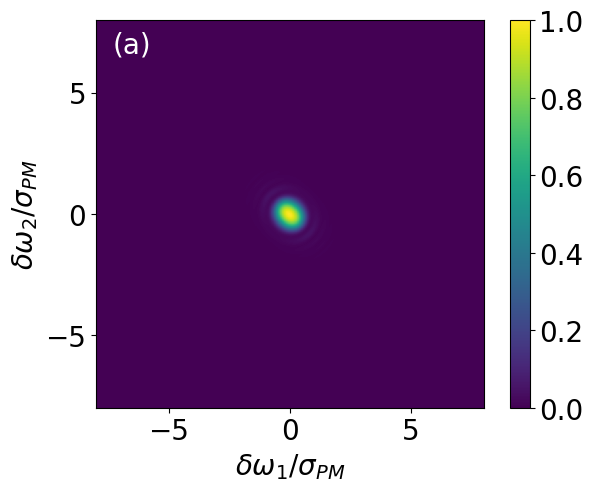

In [24]:
font={'size':20}
plt.rc('font',**font)

fig1, axs1 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)
c1=axs1.pcolor(omf/np.sqrt(np.pi),omf/np.sqrt(np.pi), jsi_integral1/np.max(jsi_integral1), rasterized=True)

axs1.set_box_aspect(1)
axs1.set_xlabel(r'$\delta\omega_{1}/\sigma_{PM}$')
axs1.set_ylabel(r'$\delta\omega_{2}/\sigma_{PM}$')

fig1.colorbar(c1)
fig1.text(0.26,0.9, '(a)',color='white')
fig1.set_edgecolor('none')
plt.gca().set_aspect('equal')

# plt.savefig("Figures_export/jsi_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

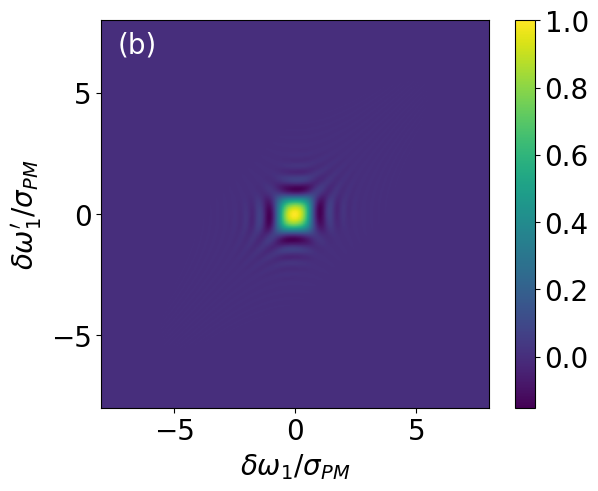

In [26]:
font={'size':20}
plt.rc('font',**font)

fig2, axs2 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

c2=axs2.pcolor(omf/np.sqrt(np.pi),omf/np.sqrt(np.pi), rho_aD1/np.max(rho_aD1))
axs2.set_xlabel(r'$\delta\omega_{1}/\sigma_{PM}$')
axs2.set_ylabel(r"$\delta\omega_{1}'/\sigma_{PM}$")
axs2.set_box_aspect(1)

fig2.colorbar(c2)
fig2.text(0.26,0.9, '(b)',color='white')
fig2.set_edgecolor('none')
plt.gca().set_aspect('equal')

# plt.savefig("Figures_export/rho_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

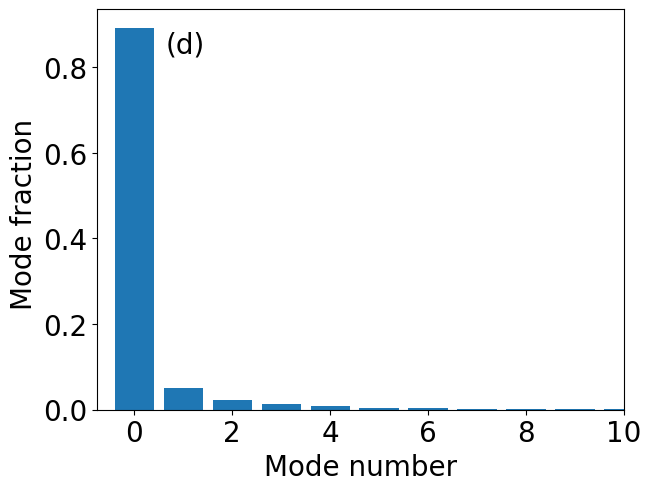

In [10]:
font={'size':20}
plt.rc('font',**font)

fig3, axs3 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

x1=np.arange(0,len(S1))
Sn1=S1/np.sum(S1)
plt.bar(x1,Sn1)

plt.xlabel(r'Mode number', fontsize = 20)
plt.ylabel(r'Mode fraction ', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.75,10)

fig3.text(0.25,0.9, '(d)',color='black')

# plt.savefig("Figures_export/modes_distribution_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

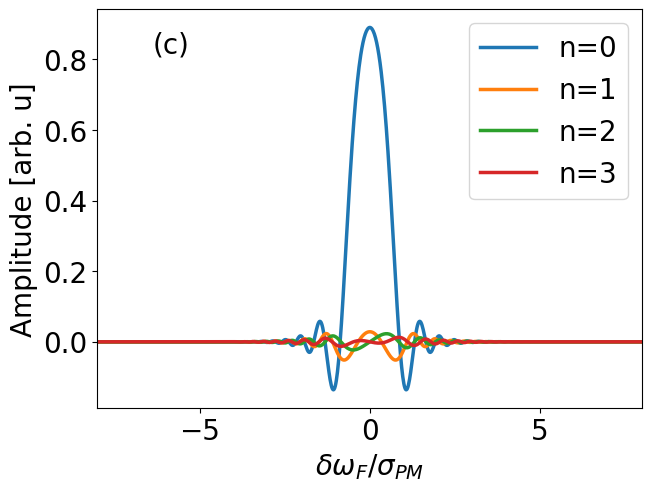

In [11]:
font={'size':20}
plt.rc('font',**font)
fig4, axs4 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)


U1n=U1/abs(U1).max(axis=0) # Normalized eigenmodes

plt.plot(omf/np.sqrt(np.pi),Sn1[0]*U1n[:,0], label='n=0',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn1[1]*U1n[:,1], label='n=1',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn1[2]*U1n[:,2], label='n=2',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn1[3]*U1n[:,3], label='n=3',linewidth=2.5)
plt.xlabel(r'$\delta\omega_{F}/\sigma_{PM}$') 
plt.ylabel("Amplitude [arb. u]") 
plt.xlim(omf[0]/np.sqrt(np.pi),omf[-1]/np.sqrt(np.pi))

fig4.text(0.23,0.9, '(c)',color='black')
plt.legend()  

# plt.savefig("Figures_export/Weighted_modes_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Data export

In [12]:
jsidict={
    "tag":"Ideal_case_scaled",
    "omf":omf,
    "jsi_proj":jsi_integral1
}

# savemat("Data_export/Ideal_case_scaled_jsi_proj.mat",jsidict)
del jsidict

In [13]:
rhodict={
    "tag":"Ideal_case_scaled",
    "omf":omf,
    "rho":rho_aD1
}
# savemat("Data_export/Ideal_case_scaled_rho.mat",rhodict)
del rhodict

In [14]:
eigendict={
    "tag":"Ideal_case_scaled",
    "neigenval":Sn1,
    "neigenmodes":U1n
}
# savemat("Data_export/Ideal_case_scaled_eigendecomposition.mat",eigendict)
del eigendict

### Experiment: Ultra-broadband pulsed pump

In [15]:
#Conditions
tau10=0  #Group-velocity matching
taup0=0  #  \beta_P << \beta_F -->\beta_P negligible in comparison to \beta_F
tauf0=1  #\beta_F >> \beta_P
T0=0  # Ultra-broadband pulsed pump --> Ultrashort pulses in the time domain

In [16]:
JSA_3D=JSAD(tau10,taup0,tauf0,omf[:,None,None],omf[None,:,None],omf[None,None,:],T0) 

In [17]:
jsi_integral=np.sum(np.square(np.abs(JSA_3D)),axis=0)
volume=np.sum(JSA_3D**2)*(omf[1]-omf[0])**3
print(volume)

10.768342747712222


In [18]:
rho_aD=np.einsum('ijk,ljk->il',JSA_3D,np.conj(JSA_3D))
U,S,Vh=np.linalg.svd(rho_aD,full_matrices=True, hermitian=True)
purity=np.sum(S)**2/np.sum(S**2)
print(purity)

1.4336214518875934


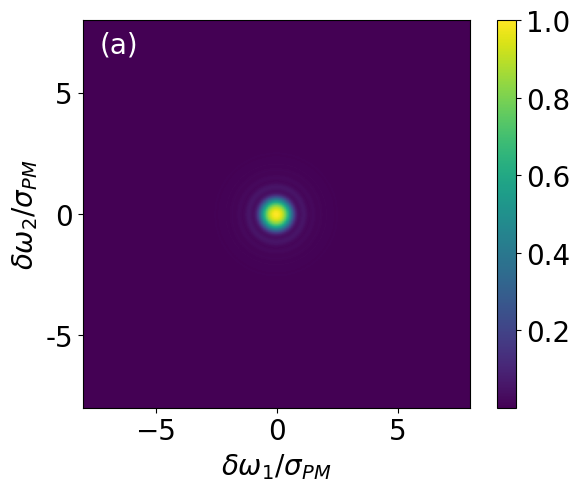

In [23]:
font={'size':20}
plt.rc('font',**font)

fig5, axs5 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

c5=axs5.pcolor(omf/np.sqrt(np.pi),omf/np.sqrt(np.pi), jsi_integral/np.max(jsi_integral), rasterized=True)

axs5.set_xlabel(r'$\delta\omega_{1}/\sigma_{PM}$')
axs5.set_ylabel(r'$\delta\omega_{2}/\sigma_{PM}$')
axs5.set_box_aspect(1)
axs5.yaxis.set_major_formatter(FormatStrFormatter('%g'))

fig5.colorbar(c5)
fig5.text(0.26,0.9, '(a)',color='white')
fig5.set_edgecolor('none')
plt.gca().set_aspect('equal')

plt.show()

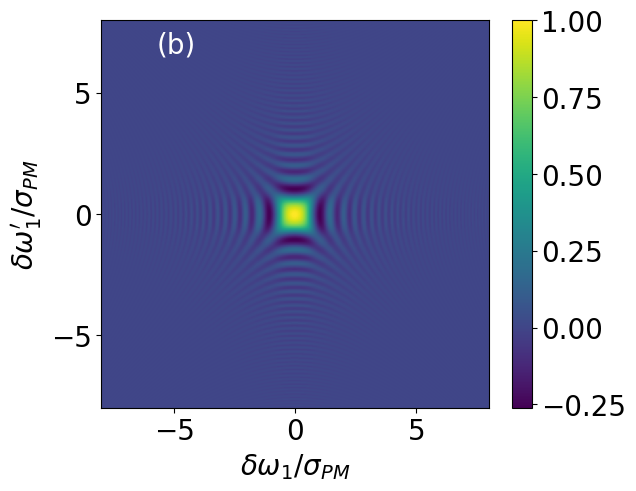

In [25]:
font={'size':20}
plt.rc('font',**font)

fig6, axs6 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

c6=axs6.pcolor(omf/np.sqrt(np.pi),omf/np.sqrt(np.pi), rho_aD/np.max(rho_aD))


axs6.set_xlabel(r'$\delta\omega_{1}/\sigma_{PM}$')
axs6.set_ylabel(r"$\delta\omega_{1}'/\sigma_{PM}$")
axs6.set_box_aspect(1)

fig6.colorbar(c6)
fig6.text(0.26,0.9, '(b)',color='white')
fig6.set_edgecolor('none')
plt.gca().set_aspect('equal')

plt.show()

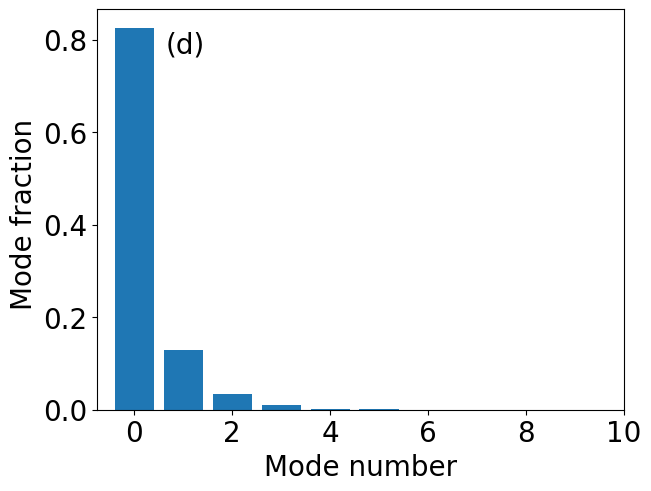

In [21]:
font={'size':20}
plt.rc('font',**font)

figev, axsev = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

x=np.arange(0,len(S))
Sn=S/np.sum(S)
plt.bar(x,Sn)

plt.xlabel(r'Mode number', fontsize = 20)
plt.ylabel(r'Mode fraction ', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.75,10)

figev.text(0.25,0.9, '(d)',color='black')

plt.show()

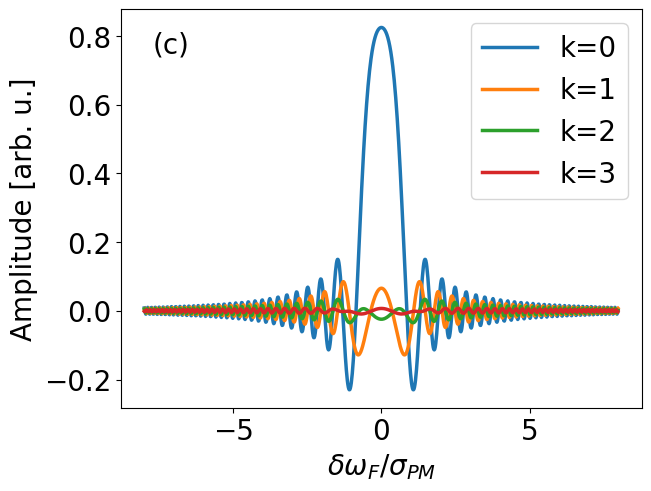

In [22]:
font={'size':20}
plt.rc('font',**font)

figm, axsm = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)

plt.plot(omf/np.sqrt(np.pi),-1*Sn[0]*U[:,0]/max(abs(U[:,0])), label='k=0',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn[1]*U[:,1]/max(abs(U[:,1])), label='k=1',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn[2]*U[:,2]/max(abs(U[:,2])), label='k=2',linewidth=2.5)# plt.plot((2*np.pi*c0/omf1)*1000,U[:,0], label='k=0',linewidth=2.5)
plt.plot(omf/np.sqrt(np.pi),Sn[3]*U[:,3]/max(abs(U[:,3])), label='k=3',linewidth=2.5)# plt.plot((2*np.pi*c0/omf1)*1000,U[:,0], label='k=0',linewidth=2.5)
plt.xlabel(r'$\delta\omega_{F}/\sigma_{PM}$')
plt.ylabel("Amplitude [arb. u.]") 

figm.text(0.23,0.9, '(c)',color='black')
# plt.xlim(8,15)
plt.legend()  

plt.show()